In [464]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# 1.Loading data

In [465]:
data=pd.read_csv("abalone.csv")

In [466]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 2.Have to add age column using ring

In [467]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# 3.Perform Vistualization

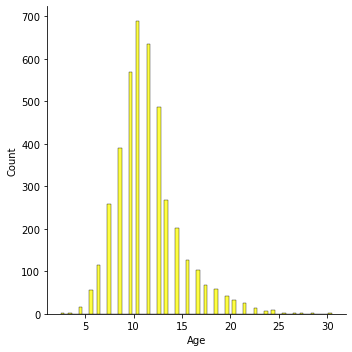

In [468]:
#Univariate

sns.displot(data["Age"],color="yellow")

<AxesSubplot:xlabel='Count', ylabel='Age'>

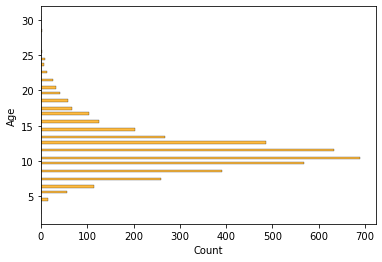

In [469]:
sns.histplot(y=data.Age,color='orange')

<AxesSubplot:xlabel='Age', ylabel='Count'>

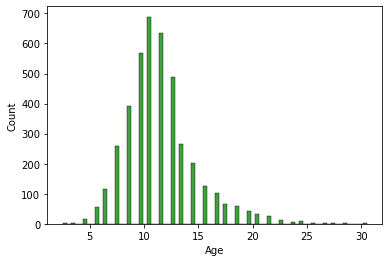

In [470]:
sns.histplot(x=data.Age,color='green')

<AxesSubplot:xlabel='Age'>

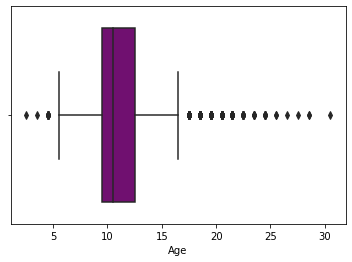

In [471]:
sns.boxplot(x=data.Age,color='purple')

<AxesSubplot:xlabel='Age', ylabel='count'>

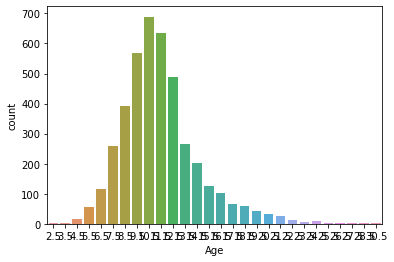

In [472]:
sns.countplot(x=data.Age)

<AxesSubplot:xlabel='Height', ylabel='Age'>

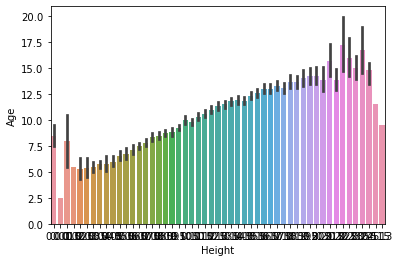

In [473]:
#Bi-variate
#Barplot

sns.barplot(x=data.Height,y=data.Age)

<AxesSubplot:xlabel='Age', ylabel='Height'>

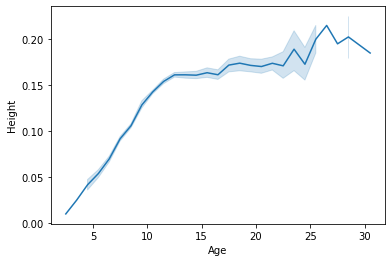

In [474]:
#Linearplot

sns.lineplot(x=data.Age,y=data.Height)

<AxesSubplot:xlabel='Age', ylabel='Height'>

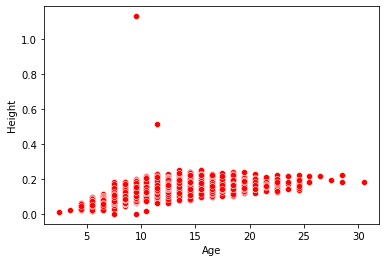

In [475]:
#scatterplot

sns.scatterplot(x=data.Age,y=data.Height,color='red')

<AxesSubplot:xlabel='Age', ylabel='Height'>

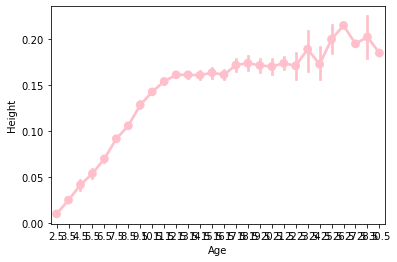

In [476]:
sns.pointplot(x=data.Age,y=data.Height,color='pink')

<AxesSubplot:xlabel='Age', ylabel='Height'>

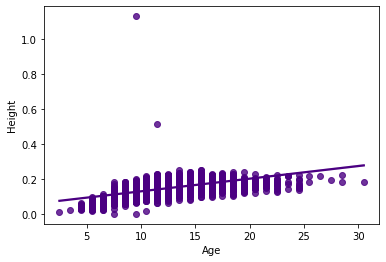

In [477]:
sns.regplot(x=data.Age,y=data.Height,color='Indigo')

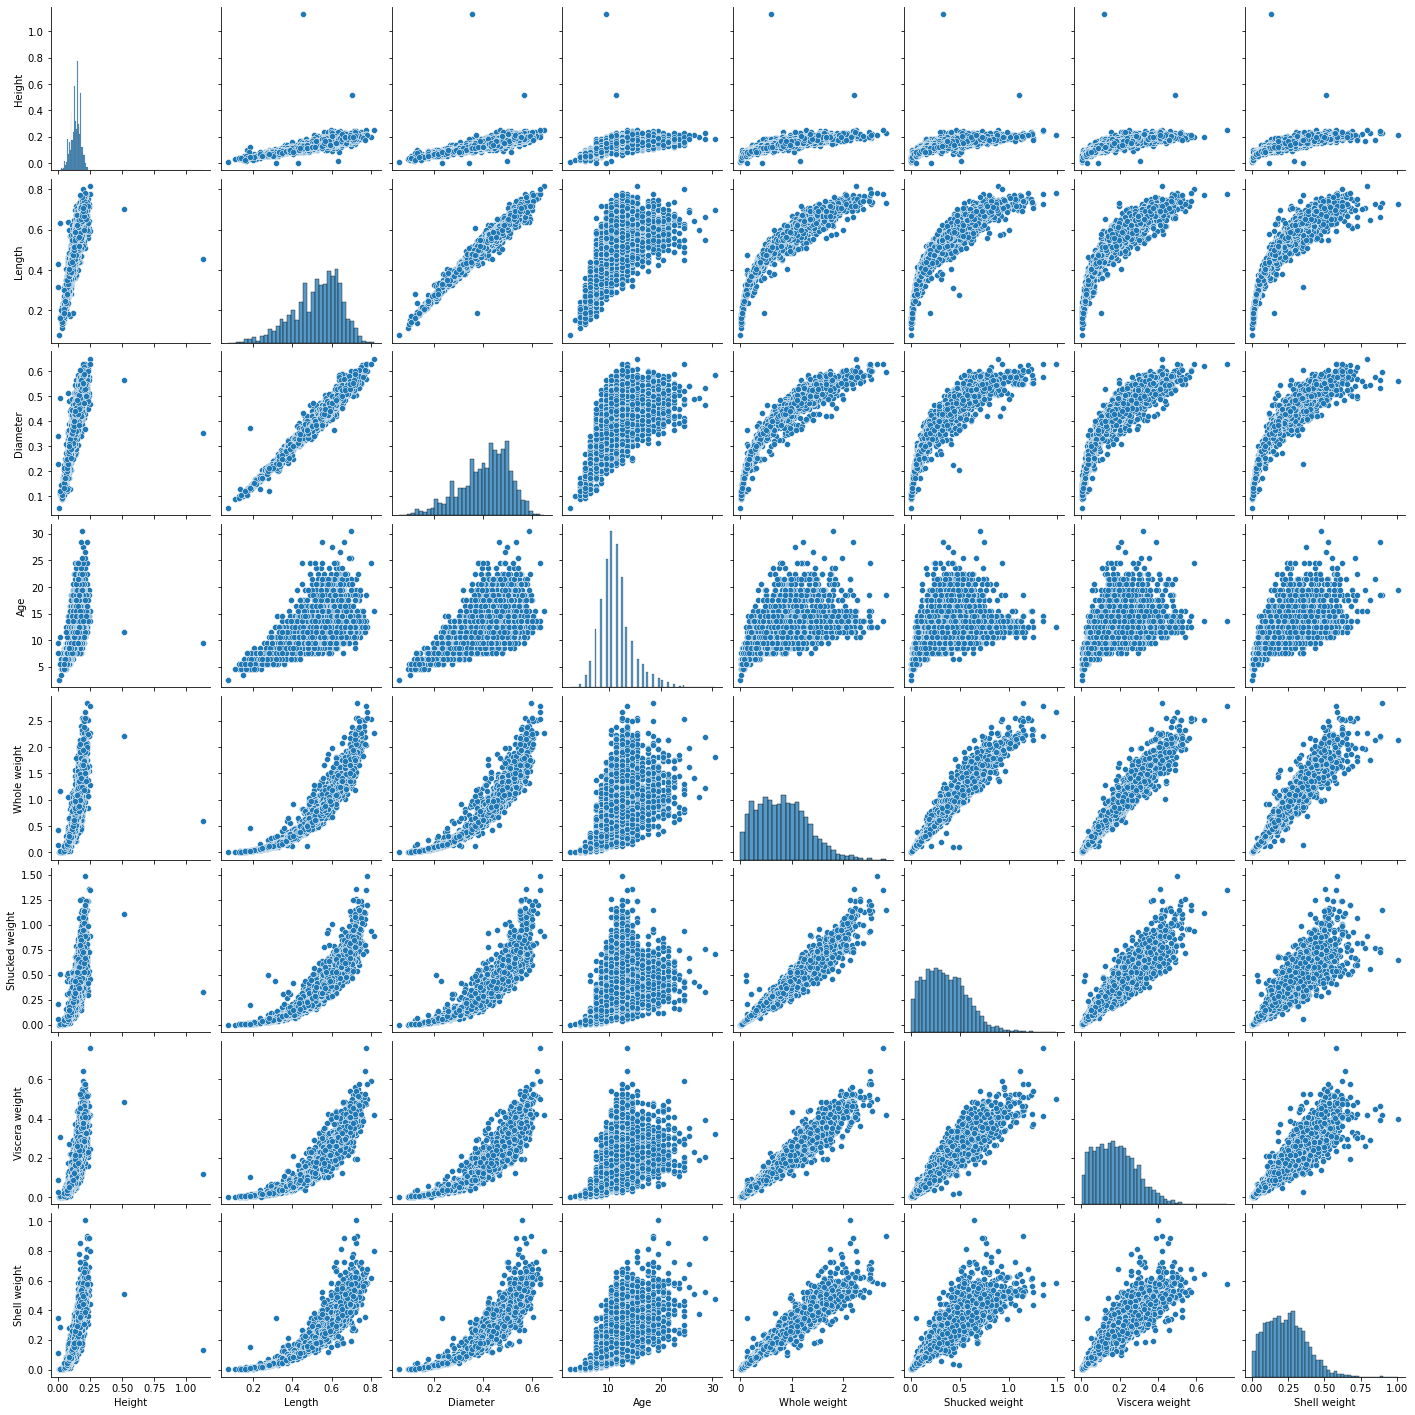

In [478]:
#Multi-variate
#pairplot

sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole weight","Shucked weight","Viscera weight","Shell weight"]])

# Descriptive Statistics

In [480]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


# 5.Check Missing values

In [482]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

# 6.Find the outliers and replace

In [484]:
outliers=data.quantile(q=(0.25,0.75))

In [485]:
outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [486]:
a=data.Age.quantile(0.25)
b=data.Age.quantile(0.75)

In [487]:
c=b-a

In [488]:
lower_limit = a-1.5*c
data.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Age               10.5000
dtype: float64

<AxesSubplot:xlabel='Age'>

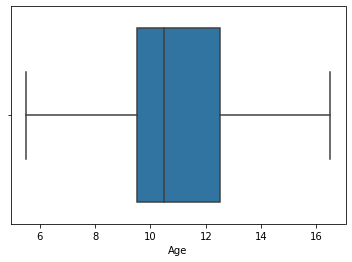

In [489]:
data['Age']=np.where(data['Age']<lower_limit,7,data['Age'])
sns.boxplot(x=data.Age,showfliers=False)

# 7.Check Categorical column and perform Encoding

In [491]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [492]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data.Sex=lab.fit_transform(data.Sex)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# 8.Split data into independent and dependent variable

In [523]:
y=data["Sex"]
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int32

In [524]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# 9.Scale the independent variable

In [525]:
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


# 10.Split the data into training and testing

In [590]:
X_Train, X_Test,Y_Train,Y_Test=train_test_split(X_Scaled, y, test_size=0.2,random_state=0)

In [591]:
X_Train.shape,X_Test.shape

((3341, 8), (836, 8))

In [592]:

Y_Train.shape,Y_Test.shape

((3341,), (836,))

In [593]:
X_Train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.543234
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-1.387181
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.577830
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.017298
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.265723


In [594]:
X_Test.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
668,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940,0.953617
1580,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685,-0.606915
3784,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209,0.329404
463,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219,-1.543234
2615,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287,0.641511


In [595]:
Y_Train.head()

3141    1
3521    1
883     2
3627    2
2106    2
Name: Sex, dtype: int32

In [596]:
Y_Test.head()

668     2
1580    1
3784    2
463     1
2615    2
Name: Sex, dtype: int32

# 11.Built Model
#Random Forest

In [598]:
model=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=3)

In [599]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10)

In [600]:
y_predict=model.predict(X_Test)

In [601]:
y_predict_train=model.predict(X_Train)

# 12.Train and Test the model

In [604]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy:',accuracy_score(Y_Train,y_predict_train))
print('Testing accuracy:',accuracy_score(Y_Test,y_predict))


Training accuracy: 0.5540257407961688
Testing accuracy: 0.5526315789473685


# Measure the performance using metrics

In [608]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,27,46,176
1,7,228,56
2,14,75,207


In [606]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.56      0.11      0.18       249
           1       0.65      0.78      0.71       291
           2       0.47      0.70      0.56       296

    accuracy                           0.55       836
   macro avg       0.56      0.53      0.49       836
weighted avg       0.56      0.55      0.50       836

